### Compute penetration depth and critical angles based on the cif for LBCO 13% doped.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
#from pymatgen import Lattice, Structure
import xrayutilities as xru
from xrayutilities.materials.cif import CIFFile
from xrayutilities.materials.material import Crystal

%matplotlib widget

define a function to compute penetration depth from
Page 70 of Al Nielsen and McMorrow

N.B. This only works for small angles 

In [2]:
def get_penetration(E, theta, xu_crystal):
    """Compute how far x-ray penetrate into sample
    !!! only valid for small theta
    parameters
    ----------
    E : float or array
        Energy in eV
    theta : float or arrah
        angle in rad
    xu_crystal : xu_crystal object
    
    returns
    -----
    Lambda : float or array
        penetration in nm
    """
    n = 1 - xu_crystal.delta(E) + 1j* xu_crystal.ibeta(E)
    alpha_p = np.arccos(np.cos(theta) / n)
    lam = 1.2398e3/E #in nm
    k = 2*np.pi/lam
    Lambda = 1/(2*k*np.imag(alpha_p))
    return Lambda

read in the cif file

In [3]:
xu_crystal = Crystal.fromCIF('LaBaCuO_HTT.cif')
E = np.linspace(5e3, 20e3, 500)

mu = xu_crystal.absorption_length(E)
th_c = xu_crystal.critical_angle(E)

Get some colors for prettiness

In [4]:
import matplotlib as mpl
colors = [c['color'] for c in mpl.rcParams['axes.prop_cycle']]

Energy dependence or the absorption length and critical angle

Text(0, 0.5, 'Crtical angle (def)')

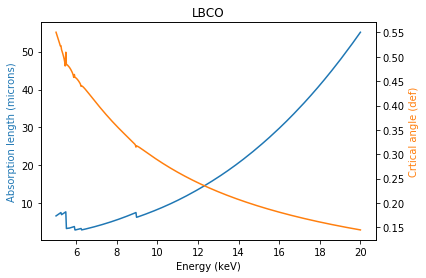

In [5]:
fig, ax = plt.subplots()

l = ax.plot(E/1e3, mu, color=colors[0])
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Absorption length (microns)', color=colors[0])
ax.set_title('LBCO')


ax_c = ax.twinx()
l_c = ax_c.plot(E/1e3, th_c, color=colors[1])
color = l_c[0].get_color()
ax_c.set_xlabel('Energy (keV)')
ax_c.set_ylabel('Crtical angle (def)', color=colors[1])


Angular dependence of the penetration into the sample 

Text(0.5, 1.0, 'Penetation into LBCO at E=15.0 keV')

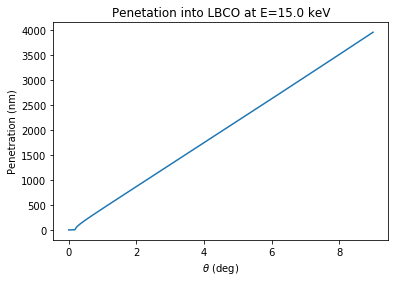

In [6]:
E = 15e3
theta = np.linspace(0, 0.1*np.pi/2, 1000)

Lambda = get_penetration(E, theta, xu_crystal)

fig, ax = plt.subplots()

ax.plot(theta*180/np.pi, Lambda)
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel('Penetration (nm)')
ax.set_title('Penetation into LBCO at E={:.1f} keV'.format(E/1e3))

Energy dependence of penetration at 0.5 deg

Text(0.5, 1.0, 'Penetration into LBCO at th=0.5 deg')

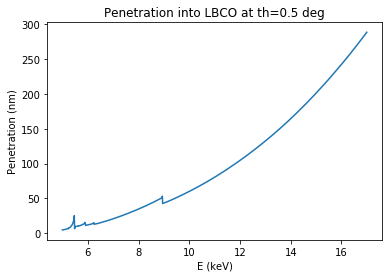

In [7]:

E = np.linspace(5e3, 17e3, 1000)
theta = 0.5 *np.pi/180

Lambda = get_penetration(E, theta, xu_crystal)

fig, ax = plt.subplots()

ax.plot(E/1e3, Lambda)
ax.set_xlabel(r'E (keV)')
ax.set_ylabel('Penetration (nm)')
ax.set_title('Penetration into LBCO at th={:.1f} deg'.format(theta*180/np.pi))

Repeat the same plot on a log scale

Text(0.5, 1.0, 'Penetration into LBCO at th=0.5 deg')

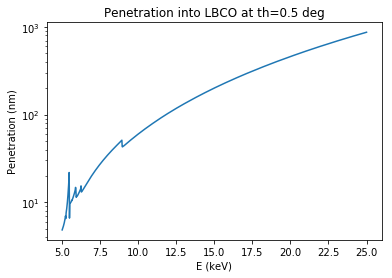

In [8]:

E = np.linspace(5e3, 25e3, 1000)
theta = 0.5 *np.pi/180

Lambda = get_penetration(E, theta, xu_crystal)

fig, ax = plt.subplots()

ax.semilogy(E/1e3, Lambda)
ax.set_xlabel(r'E (keV)')
ax.set_ylabel('Penetration (nm)')
ax.set_title('Penetration into LBCO at th={:.1f} deg'.format(theta*180/np.pi))

Compute proposed conditions

In [9]:
print("x-ray penetration at 14 keV 0.5 deg is {:.1f} nm".format(get_penetration(14000, 0.5*np.pi/180, xu_crystal)))

x-ray penetration at 14 keV 0.5 deg is 164.5 nm


In [10]:
print("x-ray penetration at 8 keV keV 2.5 deg is {:.1f} nm".format(get_penetration(8000, 2.5*np.pi/180, xu_crystal)))

x-ray penetration at 8 keV keV 2.5 deg is 245.7 nm
